In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360)


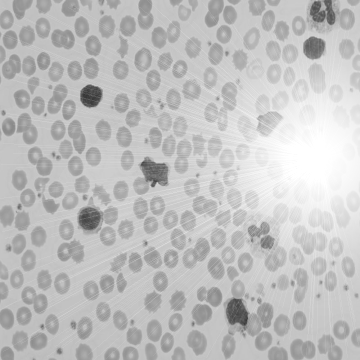

In [6]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/cell-bright.bmp')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
cv2_imshow(gImg)
#plt.imshow(gImg1, cmap='gray')

In [7]:
N = 18

dimh = np.int32(gImg.shape[0]/N)
dimw = np.int32(gImg.shape[1]/N)

dh_rest = np.int32(gImg.shape[0]%N)
dw_rest = np.int32(gImg.shape[1]%N)

meanImg = np.zeros((N,N))
outImg = np.zeros((gImg.shape[0], gImg.shape[1]))

In [10]:
def mean_function(img, dimh,dimw, h, w):
  count = 1
  sum = 0
  avg = 0

  for y in range(h, h+dimh):
    for x in range(w, w+dimw):
      sum = sum +img[y,x]
      count = count + 1

  avg = np.int32(sum/count)
  return avg

In [12]:
for h in range(0, gImg.shape[0]-dh_rest, dimh):
  for w in range(0, gImg.shape[1]-dw_rest, dimw):
    meanImg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gImg, dimh, dimw, h, w)

(18, 18)


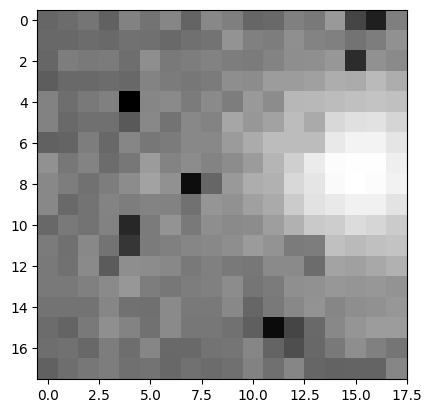

In [13]:
plt.imshow(meanImg, cmap='gray')
print(meanImg.shape)

In [16]:
for h in range(0, gImg.shape[0]-dh_rest):
  for w in range(0, gImg.shape[1]-dw_rest):
    if(gImg[h,w] > meanImg[np.int32(h/dimh), np.int32(w/dimw)]):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0

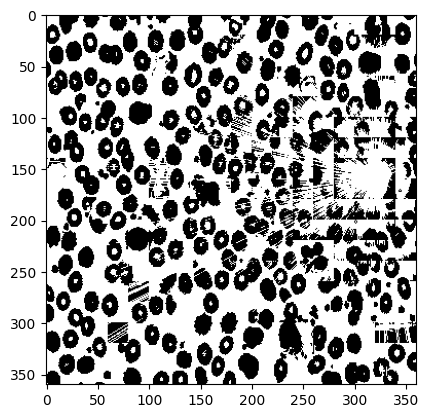

In [17]:
plt.imshow(outImg, cmap = 'gray')